# Comparing modelled heads to observations

This notebook showcases some methods to compare modelled heads to head observations.

In [1]:
from pathlib import Path

import hydropandas as hpd
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr

import nlmod

First read in model results from the IJmuiden model (03_local_grid_refinement.ipynb).

In [2]:
model_ws = Path("ijmuiden")
model_name = "IJm_planeten"

# read model dataset
ds = xr.open_dataset(model_ws / f"{model_name}.nc")

# read heads
head = nlmod.gwf.output.get_heads_da(ds)

Compute the groundwater level and plot the result for the first timestep.

In [3]:
# compute the groundwater level in each time step
gwl = nlmod.gwf.output.get_gwl_from_wet_cells(head)

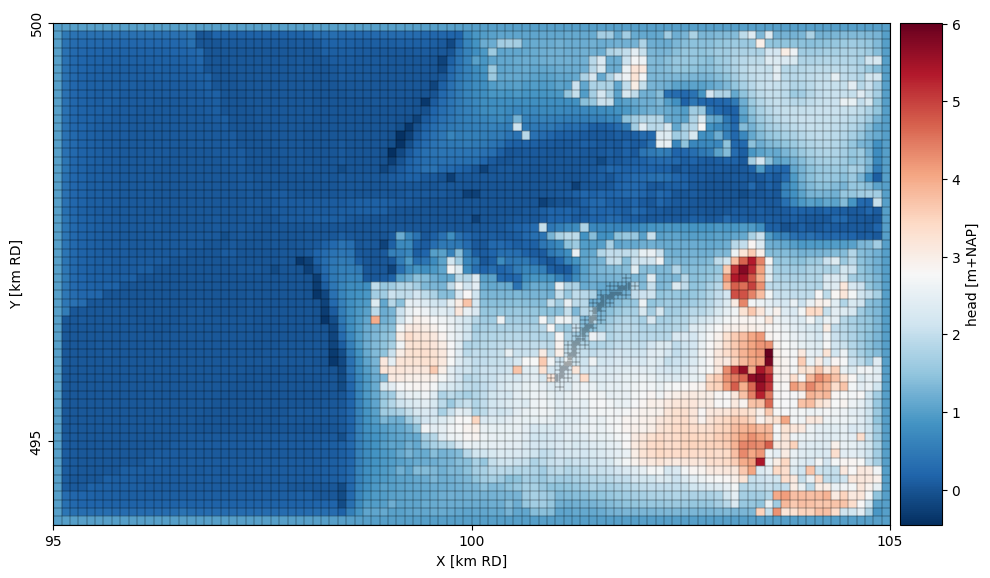

In [4]:
# plot the heads in the first aquifer
ax = nlmod.plot.map_array(
    gwl.isel(time=0), ds=ds, cmap="RdBu_r", colorbar_label="head [m+NAP]"
)

Load the measurements and plot the locations of the observation wells.

In [5]:
# df = pd.read_pickle("./data/20250428_bro_ijmuiden_np1_26_4.pklz", compression="zip")
df = hpd.read_excel("./data/20250428_bro_ijmuiden.xlsx")
df.head()

,x,y,location,filename,source,unit,tube_nr,screen_top,screen_bottom,ground_level,tube_top,metadata_available,obs
name,,,,,,,,,,,,,
GMW000000004503_001,101959.9,497438.0,GMW000000004503,NaN,BRO,mNAP,1,4.770,3.770,7.640,7.490,True,GroundwaterObs GMW000000004503_001 -----metada...
GMW000000004504_001,104691.0,497251.5,GMW000000004504,NaN,BRO,mNAP,1,0.000,-1.000,2.130,2.000,True,GroundwaterObs GMW000000004504_001 -----metada...
GMW000000004505_001,100251.4,496653.8,GMW000000004505,NaN,BRO,mNAP,1,2.936,1.936,4.795,4.696,True,GroundwaterObs GMW000000004505_001 -----metada...
GMW000000007301_001,104348.2,495624.2,GMW000000007301,NaN,BRO,mNAP,1,1.810,0.810,3.720,3.670,True,GroundwaterObs GMW000000007301_001 -----metada...
GMW000000013100_001,104554.0,499841.0,GMW000000013100,NaN,BRO,mNAP,1,1.880,0.880,3.970,3.880,True,GroundwaterObs GMW000000013100_001 -----metada...


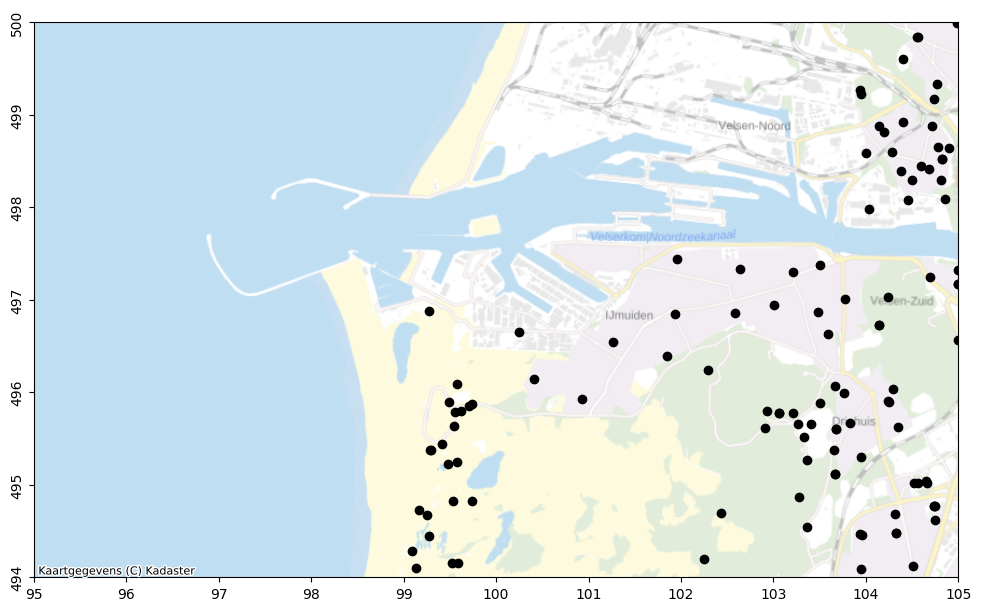

In [6]:
f, ax = nlmod.plot.get_map(nlmod.grid.get_extent(ds), background=True)
ax.plot(df.x, df.y, "ko");

## Get the modeled heads

Get the heads from the cells in which the observation wells are located. 

For this we use the `nlmod.layers.get_modellayers_indexer()` method which takes
a model dataset (defining the model grid) and a dataframe (with the observation
well metadata) as input. 

The dataframe must define the x,y locations of the
observation wells, and the top and bottom of the screens. By default it is
assumed these column names follow the hydropandas standard: `x`, `y`
`screen_top` and `screen_bottom`.

In [7]:
idx = nlmod.layers.get_modellayers_indexer(ds, df)
idx

<xarray.Dataset> Size: 5kB
Dimensions:  (name: 114)
Coordinates:
  * name     (name) object 912B 'GMW000000004503_001' ... 'GMW000000083586_001'
Data variables:
    icell2d  (name) int64 912B 2569 2796 3409 4624 195 ... 5773 5226 5227 5227
    layer    (name) <U8 4kB 'NASC' 'NAZA' 'NASC' 'NAZA' ... 'NAZA' 'NAZA' 'NAZA'

This indexer can be used directly (if no warnings were raised or if
`drop_nan_layers=True`) to obtain the heads in the cells with observation wells.


<div class="alert alert-info" role="alert">

<strong>Note:</strong> If warnings were raised, this means there are
observation wells for which the corresponding model layer could not be
determined (these probably lie above or below the model). In this case the
modellayer is returned as a float array and contains NaNs.

Some post-processing will be necessary to be able to use the indexer e.g.
dropping the NaN values:

<code>idx.dropna("name", subset=["layer"])</code>

Additionally, the layer might also have to be renamed to get the layer names
corresponding to the layer indices:

<code>idx["layer"].values = ds["layer"].values[idx["layer"].astype(int)]</code>.
</div>

Try using the indexer to get the modelled heads for each observation well

In [8]:
hsim = head.sel(**idx)
hsim

<xarray.DataArray 'getitem-813a06586f2bc474104b8d566ef103ab' (time: 6, name: 114)> Size: 5kB
array([[ 1.10675078,  1.39893507,  1.43497925,  2.84689167,  1.36070657,
         1.71318051,  1.        ,  1.68445395,  1.16007884,  2.01688855,
         1.28482494,  0.71712773,  2.19334997,  1.2505747 ,  1.12597608,
         2.73663757,  2.78076457,  1.96493248,  1.92702956,  3.30864657,
         2.0496429 ,  2.64286456,  1.80877905,  3.46930824,  2.13811631,
         2.43949518,  2.38305845,  1.48952703,  2.30162536,  1.94167015,
         2.82703741,  3.04161885,  1.75935079,  3.10714241,  2.87123027,
         2.94194952,  1.63376836,  1.48926212,  1.01943443,  2.95146091,
         2.01593913,  3.75585567,  1.        ,  0.92920868,  1.51677761,
         1.74047744,  1.8187093 ,  1.90480486,  1.91686763,  1.8187093 ,
         2.05917701,  1.69311787,  2.875103  ,  2.0496429 ,  3.30864657,
         2.73663757,  3.9564667 ,  1.92702956,  2.07094553,  2.01593913,
         1.31822576,  1.86037762,  3.45555844,  1.54215901,  2.07094553,
         2.44447832,  2.03960417,  1.72267407,  1.21821202,  1.64740698,
         1.        ,  3.26190432,  1.28999218,  2.04261639,  2.82703741,
         1.        ,  2.28371646,  2.33949717,  3.64514009,  1.01116806,
         1.92793796,  1.38974683,  1.27458739,  1.        ,  1.92856935,
         2.04261639,  2.45241491,  1.08227205,  1.90102741,  2.73048115,
         2.46831163,  2.0496429 ,  1.        ,  2.64337962,  3.43694653,
         1.36070657,  1.11436779,  1.03848608,  1.07319882,  1.17373969,
...
         2.27464512,  2.30012814,  1.57906288,  1.60415305,  2.65543588,
         1.80247106,  2.21877013,  1.61559366,  2.80167069,  1.89493369,
         2.08302648,  2.00766379,  1.26771827,  1.85328829,  1.62053041,
         2.32223236,  2.46140926,  1.46739199,  2.50523486,  2.34137285,
         2.38355578,  1.34017737,  1.20271616,  0.99757092,  2.34395231,
         1.78962497,  2.998545  ,  1.        ,  0.9148782 ,  1.32851335,
         1.59258536,  1.55193708,  1.55151513,  1.56316071,  1.55193708,
         1.73865118,  1.42164492,  2.36953904,  1.80247106,  2.65543588,
         2.27464512,  3.14003523,  1.60415305,  1.82321077,  1.78962497,
         1.12166564,  1.55813841,  2.77932147,  1.31401549,  1.82321077,
         1.97396818,  1.76655562,  1.41757273,  0.99133208,  1.49438195,
         1.        ,  2.57602157,  1.18155461,  1.70047483,  2.32223236,
         1.        ,  1.92839617,  1.96451496,  2.90758027,  0.99662322,
         1.59838806,  1.18461799,  1.09045465,  1.        ,  1.57846986,
         1.70047483,  1.97457577,  0.8854505 ,  1.55993776,  2.1796024 ,
         1.97006645,  1.80247106,  1.        ,  2.22512879,  2.75850056,
         1.26170175,  1.07527672,  1.01605824,  0.9943698 ,  1.06596931,
         1.11626389,  1.11626389,  2.14139683,  1.39694979,  0.99773449,
         1.07527672,  0.95431482,  1.1593223 ,  1.14538267,  1.16103547,
         1.0099344 ,  2.08302648,  2.04576227,  2.04576227]])
Coordinates:
    y            (name) float64 912B 4.974e+05 4.972e+05 ... 4.95e+05 4.95e+05
    x            (name) float64 912B 1.02e+05 1.046e+05 ... 1.046e+05 1.046e+05
    spatial_ref  int64 8B 0
  * time         (time) datetime64[ns] 48B 2015-01-02 2015-01-03 ... 2015-01-07
    layer        (name) <U8 4kB 'NASC' 'NAZA' 'NASC' ... 'NAZA' 'NAZA' 'NAZA'
  * name         (name) object 912B 'GMW000000004503_001' ... 'GMW00000008358...
Attributes:
    units:    m NAP

Get and plot the result for the a random observation well.

In [9]:
i = 20
hsim.isel(name=i)

<xarray.DataArray 'getitem-813a06586f2bc474104b8d566ef103ab' (time: 6)> Size: 48B
array([2.0496429 , 1.10482802, 1.5171182 , 0.75028322, 0.92767744,
       1.80247106])
Coordinates:
    y            float64 8B 4.948e+05
    x            float64 8B 1.048e+05
    spatial_ref  int64 8B 0
  * time         (time) datetime64[ns] 48B 2015-01-02 2015-01-03 ... 2015-01-07
    layer        <U8 32B 'NAZA'
    name         <U19 76B 'GMW000000022508_001'
Attributes:
    units:    m NAP

/home/david/github/nlmod/.venv/lib/python3.11/site-packages/pandas/plotting/_matplotlib/core.py:981: UserWarning: This axis already has a converter set and is updating to a potentially incompatible converter
  return ax.plot(*args, **kwds)


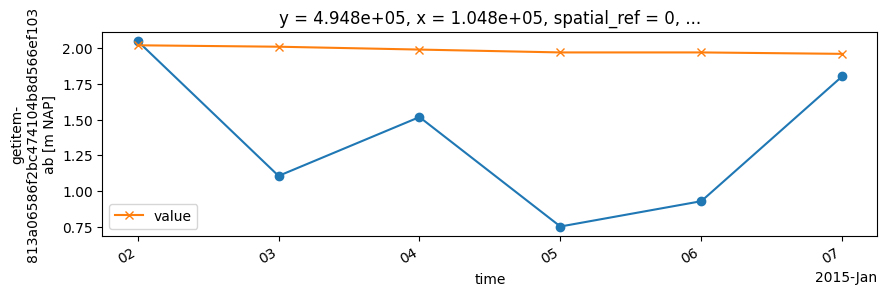

In [10]:
hsim.isel(name=i).plot(marker="o", figsize=(10, 3))
# plot observations
df.obs.loc[hsim["name"].values[i]].loc[
    pd.Timestamp(hsim.time[0].item()) : pd.Timestamp(hsim.time[-1].item())
].plot(y="value", ax=plt.gca(), marker="x");

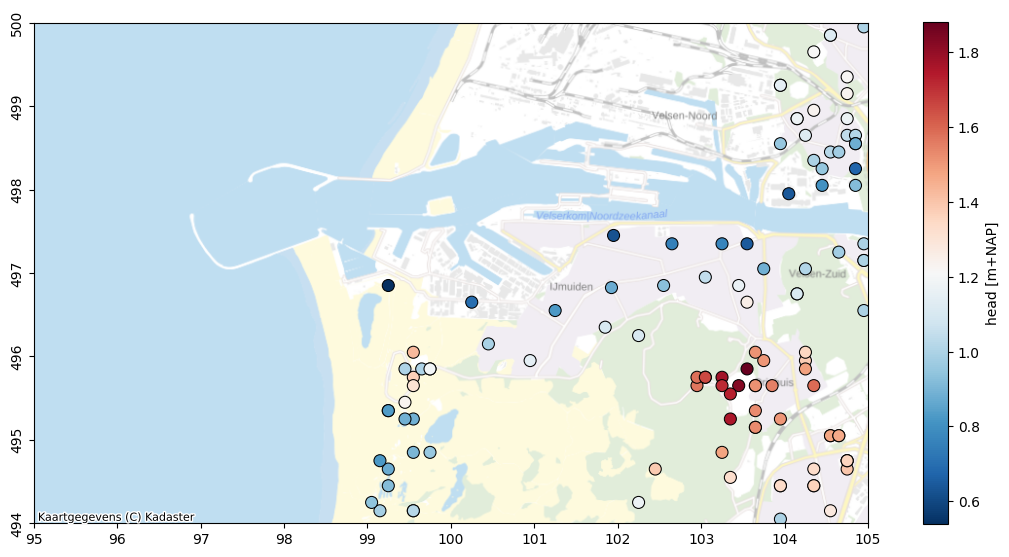

In [11]:
hmean = hsim.mean("time")

f, ax = nlmod.plot.get_map(nlmod.grid.get_extent(ds), background=True)
cm = ax.scatter(
    hmean.x,
    hmean.y,
    s=75,
    c=hmean.values,
    cmap="RdBu_r",
    edgecolors="k",
    linewidths=0.75,
)
cbar = f.colorbar(cm, ax=ax, label="head [m+NAP]", shrink=0.85)

## Interpolating heads

It is also possible to interpolate the heads at the locations of the observation wells. For this we need the original x, y coordinates of the observation wells as well as the layer each well is measuring in. 

To get all this information it can be useful to use `full_output=True` in
`nlmod.layers.get_modellayers_indexer()`. This returns every variable that is
necessary to compute the layer for each observation well. 

<div class="alert alert-info" role="alert">
<strong>Note:</strong> This also returns the model layer for the `screen_top` and `screen_bottom` separately allowing you to identify observation wells spanning multiple layers.
<div>

In [12]:
idx_full = nlmod.layers.get_modellayers_indexer(ds, df, full_output=True)
idx_full

<xarray.Dataset> Size: 48kB
Dimensions:         (name: 114, ilayer: 40)
Coordinates:
  * name            (name) object 912B 'GMW000000004503_001' ... 'GMW00000008...
Dimensions without coordinates: ilayer
Data variables:
    x               (name) float64 912B 1.02e+05 1.047e+05 ... 1.047e+05
    y               (name) float64 912B 4.974e+05 4.973e+05 ... 4.95e+05
    screen_top      (name) float64 912B 4.77 0.0 2.936 1.81 ... 1.43 1.43 1.42
    screen_bottom   (name) float64 912B 3.77 -1.0 1.936 0.81 ... 0.43 0.43 0.42
    icell2d         (name) int64 912B 2569 2796 3409 4624 ... 5226 5227 5227
    top             (name) float64 912B 7.75 2.25 4.75 3.75 ... 2.75 3.75 3.75
    botm            (ilayer, name) float64 36kB 7.25 1.75 4.25 ... -221.0 -221.0
    modellayer_top  (name) float64 912B 1.0 3.0 1.0 3.0 3.0 ... 3.0 3.0 3.0 3.0
    modellayer_bot  (name) float64 912B 1.0 3.0 1.0 3.0 3.0 ... 3.0 3.0 3.0 3.0
    layer           (name) <U8 4kB 'NASC' 'NAZA' 'NASC' ... 'NAZA' 'NAZA' 'NAZA'

Now we can use `nlmod.observations.interpolate_points_ds()` to compute the interpolated heads
at each observation well. The first argument is the data array we want to
interpolate. The second argument is a dataset containing information about the
location and layer for each observation well.

We need to pass the correct names for each variable:
 - `x`, `y`: the coordinate names for the locations of the computed heads, the default is `"x"` and `"y"`
 - `xi`, `yi`: the coordinate names of the observation wells in `idx_full`, the default is `"x"` and `"y"`
 - `layer`: the layer dimension, the default is "layer"

Our data matches the default so we don't need to adjust anything.

<div class="alert alert-warning" role="alert">
<strong>Structured grids:</strong> For structured grids the returned x and y-coordinates in <code>nlmod.layers.get_modellayers_indexer()</code> are the coordinates corresponding to the cell centers. This way the result can be directly used for indexing a data array. The original locations of the observation wells are stored under <code>"x_obs"</code> <code>"y_obs"</code>. When using structured grids make sure to pass the correct coordinate names for <code>xi</code> and <code>yi</code> to the interpolate function.
<div>

In [13]:
hsim_i = nlmod.observations.interpolate_to_points(head, idx_full)
hsim_i

<xarray.DataArray 'interpolated' (time: 6, name: 114)> Size: 5kB
array([[ 1.09882368,  1.3652765 ,  1.42938348,  2.84739458,  1.38232484,
         1.76754024,         nan,  1.64914346,  1.17395008,  2.07104227,
         1.23229713,  0.93159514,  2.22951937,  1.22985359,         nan,
         2.71580868,  2.77867807,  1.96324395,  1.95040944,  3.34597228,
         2.08396647,  2.66294725,         nan,  3.40475015,  2.14763309,
         2.47580442,  2.49391104,  1.48026958,  2.13429343,  1.90061187,
         2.81341086,  3.02447012,  1.77340221,  3.08781765,  2.83518493,
         2.91416912,  1.67630779,  1.55502336,  1.04900641,  3.01899587,
         2.02135202,  3.73628186,         nan,  0.99574758,  1.41412151,
         1.76777318,  1.77735847,  1.9090938 ,  1.87954857,  1.83110947,
         2.03341724,  1.70523712,  2.86854978,  2.08377025,  3.34520218,
         2.71563032,  4.04649466,  1.95007095,  2.03596226,  2.01703464,
         1.32987186,  1.86153848,  3.33013158,  1.51943551,  2.03618419,
         2.41401569,  2.03318851,  1.80238445,  1.20960014,  1.75067266,
         1.2017247 ,  3.1897354 ,  1.19639958,  2.02720067,  2.81359871,
                nan,  2.68308591,  2.26020363,  3.60911895,  0.81425457,
         1.88934143,  1.39052171,  1.30924074,         nan,  1.81436234,
         2.04513349,  2.39735086,  1.05443088,  1.95424878,  2.67785817,
         2.69441696,  2.06659699,         nan,  2.53414238,  3.50064581,
         1.36425505,  1.1101481 ,  1.01924304,  1.07670839,  1.17984421,
...
         2.26097801,  2.29779778,  1.57708739,  1.62294818,  2.68172195,
         1.82666531,  2.23320665,         nan,  2.75381719,  1.91293424,
         2.11028828,  2.09859474,  1.26044311,  1.72615374,  1.58975154,
         2.31526149,  2.44936679,  1.47841883,  2.48864471,  2.31252976,
         2.36255314,  1.37694218,  1.25722606,  1.02005399,  2.39362277,
         1.78941402,  2.9826101 ,         nan,  0.97760587,  1.26212404,
         1.60252698,  1.51979608,  1.55363541,  1.53886727,  1.56188468,
         1.72278695,  1.43817597,  2.36195071,  1.82654935,  2.68115401,
         2.26087292,  3.20294271,  1.62263529,  1.7951464 ,  1.7897738 ,
         1.13083248,  1.56007629,  2.68777195,  1.30990369,  1.79533735,
         1.95309681,  1.76209896,  1.48471467,  0.98108646,  1.55871569,
         1.17479726,  2.51694989,  1.1152302 ,  1.69066169,  2.31535518,
                nan,  2.22057794,  1.90919991,  2.87897045,  0.80076493,
         1.56807933,  1.18455467,  1.12080473,         nan,  1.49517106,
         1.7036919 ,  1.93322165,  0.85877054,  1.59468882,  2.14115799,
         2.14024916,  1.81323908,         nan,  2.1335144 ,  2.80536433,
         1.26385581,  1.07197315,  1.00802912,  0.99530423,  1.07176544,
         1.14894082,  1.14267749,  2.15250207,  1.31229682,  0.99930523,
         1.07006464,  0.96338915,  1.15424533,  1.14868918,  1.14544396,
         1.01480061,  2.0902976 ,  2.03063444,  2.03843901]])
Coordinates:
  * name         (name) object 912B 'GMW000000004503_001' ... 'GMW00000008358...
    spatial_ref  int64 8B 0
  * time         (time) datetime64[ns] 48B 2015-01-02 2015-01-03 ... 2015-01-07

Compare the interpolated result to the earlier result.

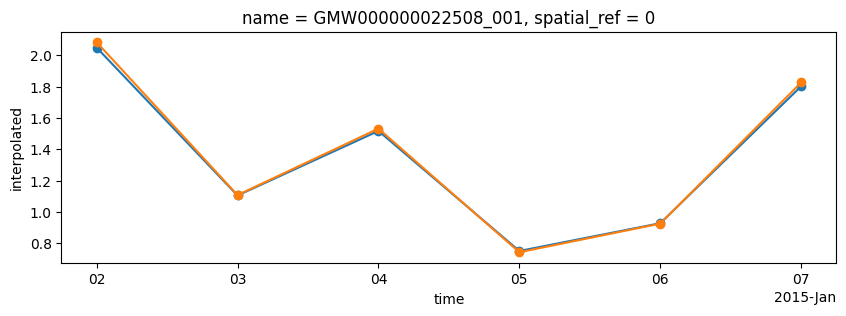

In [14]:
hsim.isel(name=i).plot(marker="o", figsize=(10, 3))
hsim_i.isel(name=i).plot(marker="o", ax=plt.gca());

Plot the location of the observation well in the grid:

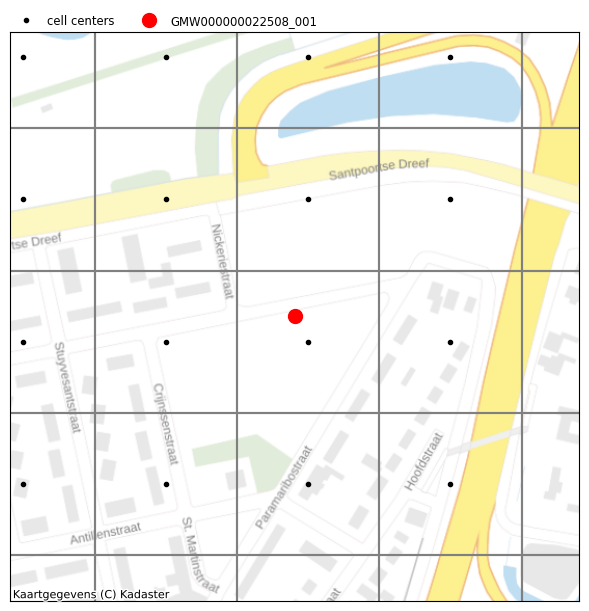

In [15]:
obswell = idx_full.isel(name=i)
extent = [obswell.x - 200, obswell.x + 200, obswell.y - 200, obswell.y + 200]
f, ax = nlmod.plot.get_map(extent, background=True, figsize=6)
nlmod.plot.modelgrid(ds, ax=ax)
ax.plot(head.x, head.y, "k.", label="cell centers")
ax.plot(obswell.x, obswell.y, "ro", markersize=10, label=obswell.name.item())
ax.legend(loc=(0, 1), frameon=False, ncol=2, fontsize="small");